## Importación de módulos/librerías

In [45]:
#Importación de librerías: importe las siguientes librerías, usando alias comunes: numpy, pandas, geopandas
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [46]:
#Leer datos censales
manz=gpd.read_file('R13/MANZANA_IND_C17.shp')
com=gpd.read_file('R13/COMUNA_C17.shp')

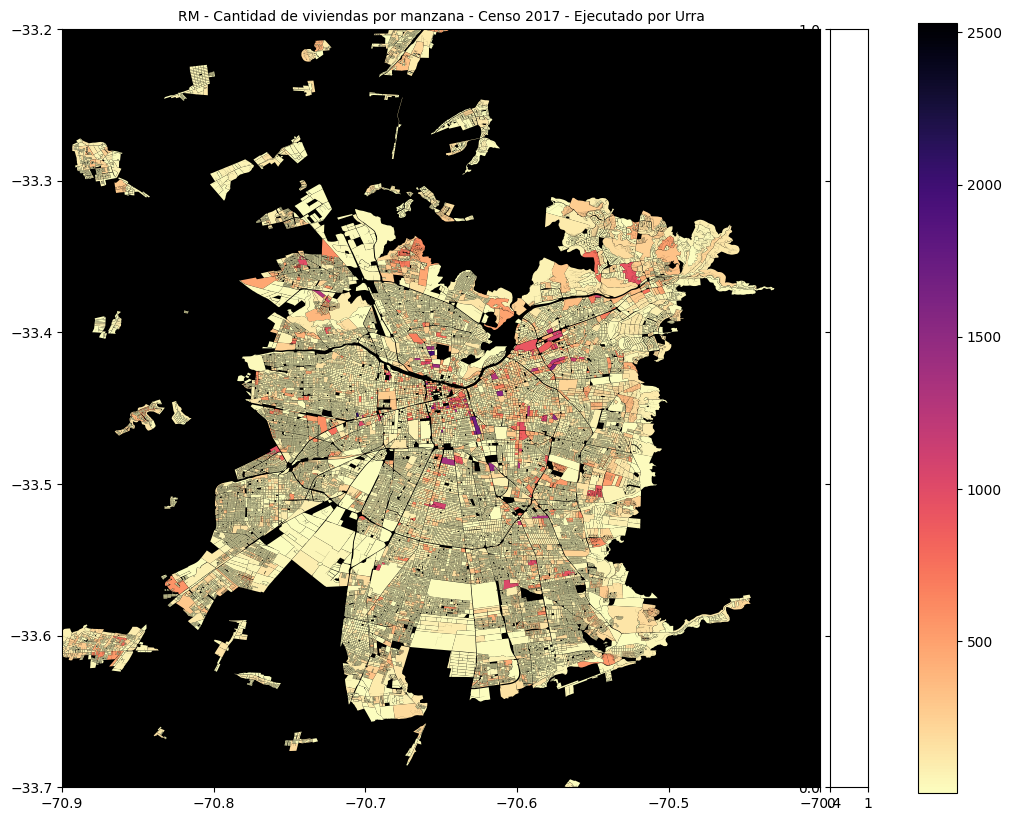

In [47]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors

#Crear figura y ejes
fig=plt.figure(figsize=(13,10))
ax=fig.add_subplot(111)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# cantidad de personas por vivienda promedio
Z=manz['TOTAL_VIVI']
dens_vmax = manz['TOTAL_VIVI'].max()
manz.plot(ax=ax, column='TOTAL_VIVI', cmap='magma_r', legend=True)

com_projected = com.to_crs(epsg=3857)
com_projected.boundary.plot(ax=ax, lw=0.2, color='k')

xlim=[-70.9,-70.4]
ylim=[-33.7,-33.2]
for x, y, label in zip(com_projected.geometry.centroid.x, com_projected.geometry.centroid.y, com_projected.NOM_COMUNA):
    if xlim[0]<x<xlim[1] and ylim[0]<y<ylim[1]:
        ax.text(x, y, label, fontsize = 10)

ax.set_facecolor('Black')
ax.set_xlim(xlim)
ax.set_ylim(ylim);

## Set título
ax.set_title('RM - Cantidad de viviendas por manzana - Censo 2017 - Ejecutado por Urra',fontsize=10)

## Guardar imagen
fig.savefig('EXTRA_ViviendasRM_C2017_Urra.jpg')